In [110]:
#eva

In [111]:
#module and libraries

#data processing
import pandas as pd

#Machine learning library
import sklearn
from sklearn.model_selection import train_test_split

#Analyze model
import shap

#visualization
import matplotlib.pylab as pl

from Model.ModelModule import DSWorkshopModel  # separate python file which hold data and run models

In [112]:
categorial_features = ["hospital_id", "ethnicity", "gender", "icu_admit_source", 
                       "apache_3j_bodysystem", "apache_2_bodysystem", "icu_stay_type", "icu_type"]

numerical_features = ["age", "bmi","height", "weight", 
                      "pre_icu_los_days", "gcs_eyes_apache","apache_2_diagnosis",
                      "gcs_motor_apache", "gcs_verbal_apache", "heart_rate_apache",
                     "map_apache", "resprate_apache", "temp_apache", "d1_diasbp_max",
                      "d1_diasbp_min","d1_diasbp_noninvasive_max", "d1_diasbp_noninvasive_min",
                      "d1_heartrate_max", "d1_heartrate_min", "d1_mbp_max", "d1_mbp_min", 
                      "d1_mbp_noninvasive_max", "d1_mbp_noninvasive_min", "d1_resprate_max", 
                      "d1_resprate_min","d1_spo2_max", "d1_spo2_min", "d1_sysbp_max", "d1_sysbp_min",
                      "d1_sysbp_noninvasive_max", "d1_sysbp_noninvasive_min", "d1_temp_max", 
                      "d1_temp_min","h1_diasbp_max", "h1_diasbp_min", "h1_diasbp_noninvasive_max", 
                      "h1_diasbp_noninvasive_min","h1_heartrate_max", "h1_heartrate_min", 
                      "h1_mbp_max", "h1_mbp_min","h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min",
                      "h1_resprate_max", "h1_resprate_min","h1_spo2_max", "h1_spo2_min", 
                      "h1_sysbp_max", "h1_sysbp_min","h1_sysbp_noninvasive_max", 
                      "h1_sysbp_noninvasive_min", "d1_glucose_max", "d1_glucose_min",
                      "d1_potassium_max", "d1_potassium_min", "apache_4a_hospital_death_prob", 
                      "apache_4a_icu_death_prob","apache_3j_diagnosis"]


binary_features = ["arf_apache", "gcs_unable_apache", "intubated_apache", 
                   "ventilated_apache", "elective_surgery", "apache_post_operative",
                   "aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure", "immunosuppression",
                   "leukemia", "lymphoma", "solid_tumor_with_metastasis"]

## Help methods

In [113]:
def getBasicDataset(): #return dataset without empty column, shuffled and with onehot encoding
    complete_data = pd.read_csv('dataset.csv') #load the dataset
    complete_data.drop(complete_data.columns[[0,1,83]], axis=1, inplace=True) #delete feature 83 which is empty column
    complete_data = complete_data.sample(frac=1) #shuffle
    complete_data = pd.get_dummies(complete_data,columns=categorial_features) #one hot encoding for categories
    return complete_data

In [114]:
# Filling missing NUMERICAL values with mean
def fill_missing_num_values_with_mean(complete_data):
    for feature in numerical_features:
        if feature in complete_data.columns:
            mean_value = complete_data[feature].mean()
            complete_data[feature].fillna(value=mean_value, inplace=True)
    return complete_data

In [115]:
def fill_test_missing_values_binary(x_test,x_train): 
    #add column for binary missing values
    binary_features_with_missing_values = x_test[binary_features].columns[x_test[binary_features].isnull().any()]
    for f in binary_features_with_missing_values:
        name = "missing " + f
        x_test[name] = (x_test[f].isnull()).astype(int) # add feature which tell when value is missing
    # change missing values to 0 in the original feature
    for f in binary_features:
        x_test[f] = x_test[f].fillna(0)
    return x_test

In [116]:
# Filling missing NUMERICAL values with mean
def fill_test_missing_num_values_with_mean(x_test,x_train):
    for feature in numerical_features:
        if feature in x_test.columns:
            mean_value = x_train[feature].mean()
            x_test[feature].fillna(value=mean_value, inplace=True)
    return x_test

In [117]:
def fill_missing_values_binary(df): 
    #add column for binary missing values
    binary_features_with_missing_values = df[binary_features].columns[df[binary_features].isnull().any()]
    for f in binary_features_with_missing_values:
        name = "missing " + f
        df[name] = (df[f].isnull()).astype(int) # add feature which tell when value is missing
    # change missing values to 0 in the original feature
    for f in binary_features:
        df[f] = df[f].fillna(0)
    return df

In [118]:
def selectSampleForSHAP(y_true, y_pred):
    y_true.to_numpy()
    false_pos = []
    true_pos= []
    false_neg=[]
    true_neg=[]
    for i in range(len(y_true)):
        if y_pred[i]==0 and y_true[i] ==0 :
            true_neg.append(i)
#         if y_pred[i]==0 and y_true[i] ==1 :
#             false_neg.append(i)
#         if y_pred[i]==1 and y_true[i] ==1 :
#             true_pos.append(i)
#         if y_pred[i]== 1 and y_true[i] ==0 :
#             true_pos.append(i)
        
    for x in range(len(false_pos)):
        print (false_pos[x])
    for x in range(len(false_pos)):
        print (true_pos[x])
    for x in range(len(false_pos)):
        print (false_neg[x])
    for x in range(len(false_pos)):
        print (true_neg[x])

## Try oversampling for getting more balanced data

In [119]:
df = getBasicDataset()
#prepare data
x_data = df.drop('hospital_death', axis=1)
true_values = df.hospital_death
x_train, x_test, y_train, y_test = train_test_split(x_data, true_values, test_size=0.2, stratify=true_values, shuffle=True)
x_train = fill_missing_num_values_with_mean(x_train)
x_train = fill_missing_values_binary(x_train)
x_test = fill_test_missing_num_values_with_mean(x_test,x_train)
x_test = fill_test_missing_values_binary(x_test, x_train)

oversample = RandomOverSampler(sampling_strategy='minority')
x_np = x_train.to_numpy()
y_np = y_train.to_numpy()
x_np, y_np = oversample.fit_resample(x_np, y_np)
# Convert back to pandas
x_train = pd.DataFrame(x_np, columns=x_train.columns)
y_train = pd.Series(y_np, name=y_train.name)

In [120]:
#init model
model = DSWorkshopModel(df)
model.set_split(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

In [122]:
#train mondel
model.train()

#test model
models_predictions, pred_results = model.test()

#results
print(pred_results)

          Method  Precision Score  Recall Score  F1 Score  \
0   RandomForest         0.654867      0.280480  0.392747   
1     ExtraTrees         0.757979      0.180038  0.290965   
2  XGBClassifier         0.361000      0.684144  0.472616   

   Unbalanced Accuracy Score  Balanced Accuracy Score  \
0                   0.925149                 0.633259   
1                   0.924276                 0.587304   
2                   0.868233                 0.784882   

   Positive Accuracy Score  Negative Accuracy Score Time Needed for Training  
0                  0.28048                  0.98604                   28.09s  
1                  0.18004                  0.99457                   43.06s  
2                  0.68414                  0.88562                   60.75s  


## Explain oversample model with shap

In [123]:
import shap
import xgboost

xgb = model.get_models()[2] #xgboost

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


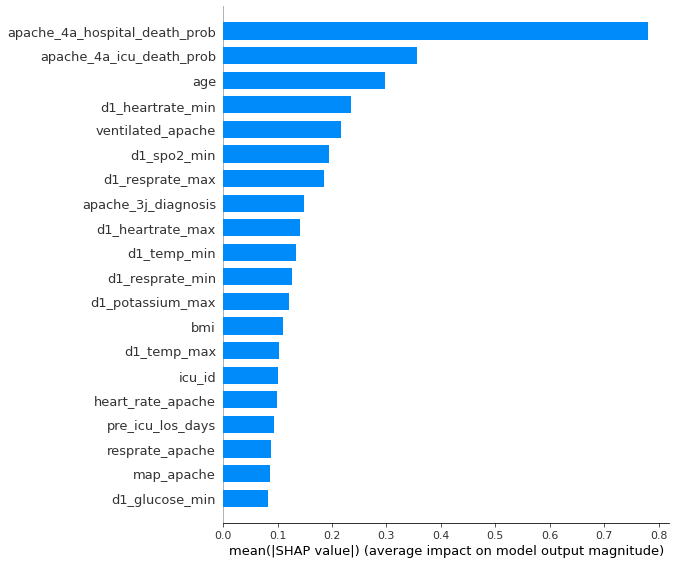

In [124]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test)


shap.summary_plot(shap_values, x_test, plot_type="bar")
#find index of test with all type of result:truepos, true neg... make shap and analyze 
# index_test =0
# shap.force_plot(explainer.expected_value, shap_values[index_test,:], x_test.iloc[index_test,:])

In [125]:
shap.force_plot(explainer.expected_value, shap_values[:300,:], x_test.iloc[:300,:])

In [126]:

#selectSampleForSHAP(y_test,models_predictions[2]) #not working why?

## Basic model

In [127]:
df = getBasicDataset()
df.head()

age        bmi  elective_surgery  height  icu_id  pre_icu_los_days  \
69981  84.0  36.575089                 0   162.6     711          3.543750   
84638  77.0  26.604959                 0   182.9     888          1.560417   
12335  64.0  29.857341                 0   178.0     185          0.063194   
26802  67.0  24.308230                 0   172.7     376         14.227778   
36907  53.0  20.549591                 0   158.0     434          0.129861   

       weight  apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
69981    96.7               102.0               206.01                      0   
84638    89.0               113.0               501.05                      0   
12335    94.6               112.0               107.01                      0   
26802    72.5               113.0               501.06                      0   
36907    51.3               303.0               211.09                      0   

       ...  icu_stay_type_readmit  icu_stay_type_transfer  icu_type_CCU-CTICU  \
69981  ...                      0                       0                   1   
84638  ...                      0                       0                   0   
12335  ...                      0                       0                   1   
26802  ...                      0                       0                   0   
36907  ...                      0                       1                   0   

       icu_type_CSICU  icu_type_CTICU  icu_type_Cardiac ICU  icu_type_MICU  \
69981               0               0                     0              0   
84638               0               0                     0              0   
12335               0               0                     0              0   
26802               0               0                     0              0   
36907               0               0                     0              1   

       icu_type_Med-Surg ICU  icu_type_Neuro ICU  icu_type_SICU  
69981                      0                   0              0  
84638                      1                   0              0  
12335                      0                   0              0  
26802                      1                   0              0  
36907                      0                   0              0  

[5 rows x 266 columns]

In [128]:
#prepare data
x_data = df.drop('hospital_death', axis=1)
true_values = df.hospital_death
x_train, x_test, y_train, y_test = train_test_split(x_data, true_values, test_size=0.2, stratify=true_values, shuffle=True)
x_train = fill_missing_num_values_with_mean(x_train)
x_train = fill_missing_values_binary(x_train)
x_test = fill_test_missing_num_values_with_mean(x_test,x_train)
x_test = fill_test_missing_values_binary(x_test, x_train)

In [129]:
#init model
model = DSWorkshopModel(df) 
model.set_split(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

In [130]:
#train mondel
model.train()

#test model
models_predictions, pred_results = model.test()

#results
print(pred_results)

          Method  Precision Score  Recall Score  F1 Score  \
0   RandomForest         0.727451      0.234365  0.354515   
1     ExtraTrees         0.766423      0.198989  0.315948   
2  XGBClassifier         0.687898      0.341124  0.456081   

   Unbalanced Accuracy Score  Balanced Accuracy Score  \
0                   0.926348                 0.613036   
1                   0.925639                 0.596631   
2                   0.929782                 0.663253   

   Positive Accuracy Score  Negative Accuracy Score Time Needed for Training  
0                  0.23437                  0.99171                   14.96s  
1                  0.19899                  0.99427                   19.03s  
2                  0.34112                  0.98538                   34.09s  
